Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#!pip install tensorflow==2.8
#!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [3]:
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_test/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2265
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:

## Using seed=123 while creating the dataset using tf.keras.preprocessing.image_dataset_from_directory
## Resized  images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2265 files belonging to 9 classes.
Using 1812 files for training.


In [ ]:

## Using seed=123 while creating the dataset using tf.keras.preprocessing.image_dataset_from_directory
## Resized  images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2265 files belonging to 9 classes.
Using 453 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [7]:
import matplotlib.pyplot as plt
import cv2
from skimage import io
import glob
import random

In [ ]:
# path to the dataset
DATASET_PATH = '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train'

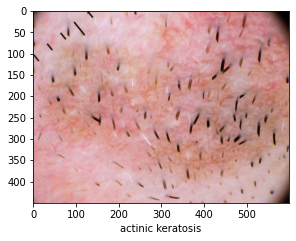

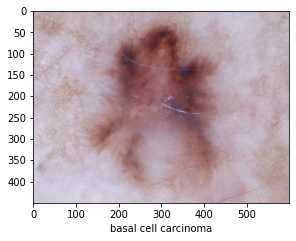

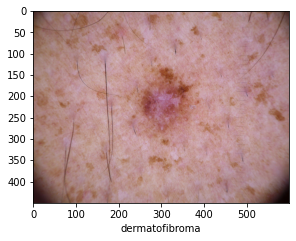

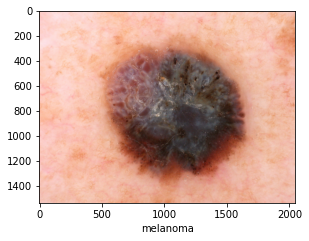

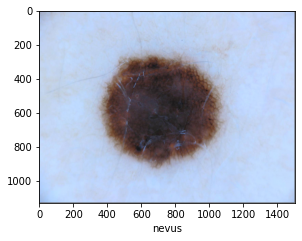

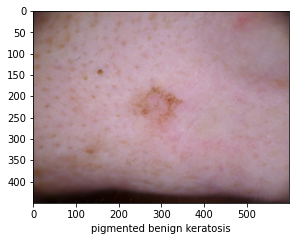

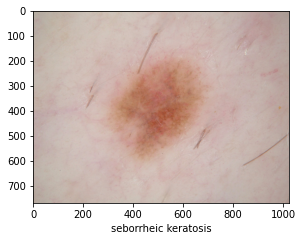

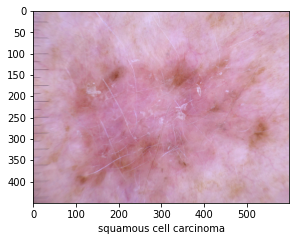

In [ ]:
for i in range(0,8):
  plt.figure(figsize=(20, 12))
  plt.subplot(3,3,i+1)
  disease_path = os.path.join(DATASET_PATH, class_names[i], '*')
  disease_path = glob.glob(disease_path)
  image = io.imread(disease_path[random.randint(0,10)])
  plt.imshow(image)
  plt.xlabel(class_names[i])
  plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the model
#### A CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

# Model M1

In [ ]:
num_class = 9
model = Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

## Compiling the model
### Choosing Adam optimiser and Sparse_categorical_crossentropy loss function for model training as it is a multi class identification problem

In [ ]:
### Adam optimiser and Sparse_categorical_crossentropy loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 180, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 180, 180, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1

### Training the model on 20 epochs

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 793s 10s/step - loss: 8.1781 - accuracy: 0.2936 - val_loss: 1.7117 - val_accuracy: 0.3642
Epoch 2/20
57/57 [==============================] - 536s 9s/step - loss: 1.6151 - accuracy: 0.4310 - val_loss: 1.5543 - val_accuracy: 0.4150
Epoch 3/20
57/57 [==============================] - 540s 9s/step - loss: 1.4290 - accuracy: 0.5088 - val_loss: 1.5455 - val_accuracy: 0.4636
Epoch 4/20
57/57 [==============================] - 538s 9s/step - loss: 1.3363 - accuracy: 0.5315 - val_loss: 1.5307 - val_accuracy: 0.4283
Epoch 5/20
57/57 [==============================] - 538s 9s/step - loss: 1.1181 - accuracy: 0.6280 - val_loss: 1.5504 - val_accuracy: 0.4636
Epoch 6/20
57/57 [==============================] - 540s 9s/step - loss: 1.0697 - accuracy: 0.6325 - val_loss: 1.6999 - val_accuracy: 0.4680
Epoch 7/20
57/57 [==============================] - 536s 9s/step - loss: 0.8228 - accuracy: 0.7103 - val_loss: 1.7348 - val_accuracy: 0.4746
Epoch 8/20
5

**We can see that the training accuracy is around 90% but the validation accuracy is low (less than 50%). Clearly, the model has overfitted. Hence we need to regularize the model**




### Visualizing training results

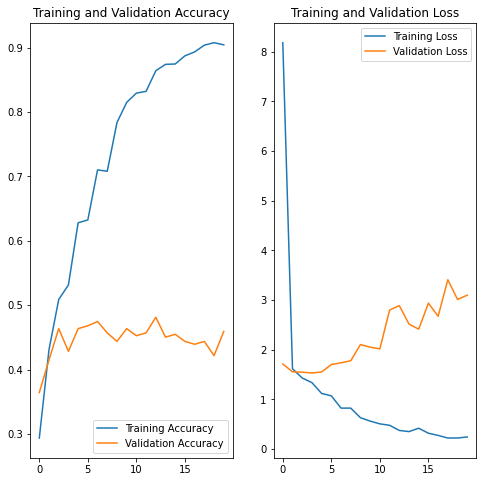

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The gap between training and validation accuracy seems to increase after 3-4 epochs indicating overfitting.

**We need to further improve the train data through augmentation or reducing class imbalance and tune the model**

# Data Augmentation layer

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

])

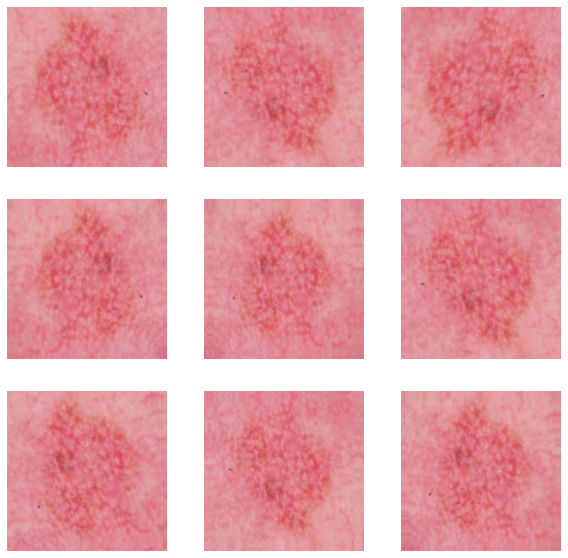

In [ ]:
# Visualizing the random flip and rotation + zoom augmentations for some instances of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


# Model M2

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

### Adding drop out of 0.2 to reduce the overfitting problem

In [ ]:
#building the model with augmentation
num_class=9
model = Sequential([
    data_augmentation,
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

### Compiling the model

In [ ]:
## Compiling using Adam optimizer and sparse_categorical_crossentropy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 180, 180, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 180, 180, 32)     0         
 g2D)                                                 

### Training the model on 20 epochs

In [ ]:
## Training for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 683s 12s/step - loss: 15.3361 - accuracy: 0.2483 - val_loss: 1.9071 - val_accuracy: 0.2472
Epoch 2/20
57/57 [==============================] - 680s 12s/step - loss: 1.7634 - accuracy: 0.3731 - val_loss: 1.8224 - val_accuracy: 0.3289
Epoch 3/20
57/57 [==============================] - 697s 12s/step - loss: 1.6857 - accuracy: 0.4062 - val_loss: 1.8651 - val_accuracy: 0.3444
Epoch 4/20
57/57 [==============================] - 689s 12s/step - loss: 1.6432 - accuracy: 0.4167 - val_loss: 1.6234 - val_accuracy: 0.4084
Epoch 5/20
57/57 [==============================] - 663s 12s/step - loss: 1.5792 - accuracy: 0.4349 - val_loss: 1.6923 - val_accuracy: 0.3422
Epoch 6/20
57/57 [==============================] - 660s 11s/step - loss: 1.5104 - accuracy: 0.4779 - val_loss: 1.5552 - val_accuracy: 0.4349
Epoch 7/20
57/57 [==============================] - 655s 11s/step - loss: 1.5258 - accuracy: 0.4879 - val_loss: 1.6008 - val_accuracy: 0.4150
Epoch

### Visualizing the results

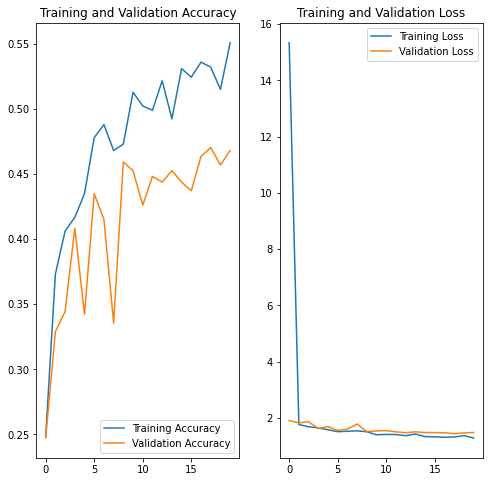

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# glob('./Skin cancer ISIC The International Skin Imaging Collaboration/train/*/*')
# './Skin cancer ISIC The International Skin Imaging Collaboration/train\\actinic keratosis\\ISIC_0025780.jpg'

### After including Dropout the model seems to have lesser gap between training and validation accuracy but higher loss. We have reduced overfitting, however, we still need to improve the performance of the model.

## Class Imbalance

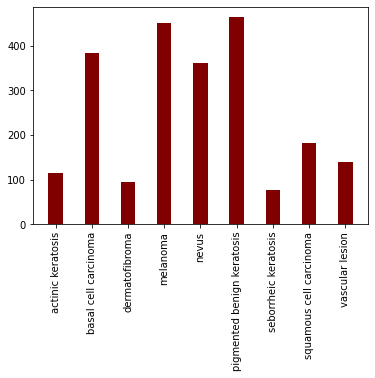

In [ ]:
## Your code goes here.
## original_df - > path_list, lesion_list
import seaborn as sns
for i in class_names :
  image_count_train = len(list(data_dir_train.glob(i+'*/*.jpg')))
  plt.bar(i,image_count_train, color ='maroon',
        width = 0.4)
  plt.xticks(rotation=90)
  

**Class Imbalance analysis**
#### - seborrheic keratosis has the least number of samples - 77
#### - pigmented benign keratosis (464 samples), melanoma  (450 samples) dominate the data in terms proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


# Augmentor Library layer code

In [ ]:

pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_training_dataset='/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability = 0.4, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.4)
    p.random_distortion(probability=0.3,grid_width=3,grid_height=3,magnitude=3)
   # p.rotate_random_90(probability=0.3)
    p.shear(probability=0.2,max_shear_left=10,max_shear_right=10)
    p.flip_top_bottom(probability=0.3)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F07AD1F1050>: 100%|██████████| 500/500 [00:31<00:00, 15.81 Samples/s]


Initialised with 384 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F070D9EB2D0>: 100%|██████████| 500/500 [00:31<00:00, 15.67 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F070D9DFB10>: 100%|██████████| 500/500 [00:27<00:00, 18.50 Samples/s]


Initialised with 450 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F070DAB6F10>: 100%|██████████| 500/500 [02:13<00:00,  3.74 Samples/s]


Initialised with 361 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F070D602E90>: 100%|██████████| 500/500 [01:42<00:00,  4.87 Samples/s]


Initialised with 464 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F070D63A650>: 100%|██████████| 500/500 [00:26<00:00, 18.57 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F070D9EB190>: 100%|██████████| 500/500 [01:01<00:00,  8.10 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F070D63A850>: 100%|██████████| 500/500 [00:27<00:00, 17.94 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F070D6D0410>: 100%|██████████| 500/500 [00:26<00:00, 18.72 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
os.path.join(data_dir_train, '*','output','*.jpg')

'/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train/*/output/*.jpg'

In [ ]:
path_list_new = [x for x in glob.iglob(os.path.join(data_dir_train, '*','output','*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.iglob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

### Original DF with image imbalance

In [ ]:
path_list = [x for x in glob.iglob(os.path.join(data_dir_train,'*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.iglob(os.path.join(data_dir_train,'*/*','*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

### New DF with added images

In [ ]:
new_df = original_df.append(df2)

###Let's see the distribution of augmented data after adding new images to the original training data.

In [ ]:
new_df['Label'].value_counts()

dermatofibroma                1000
nevus                         1000
melanoma                      1000
squamous cell carcinoma       1000
basal cell carcinoma           765
seborrheic keratosis           500
vascular lesion                500
pigmented benign keratosis     500
actinic keratosis              500
Name: Label, dtype: int64

### So, now we have a minimum of 500 images to all the classes to maintain some class balance.

#### Training the model on the data created using Augmentor

#### Training dataset

In [9]:
data_dir_train='/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train',
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6765 files belonging to 9 classes.
Using 5412 files for training.


#### Validation dataset

In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/Colab_Notebooks/melanoma_assign_train/Train',
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6765 files belonging to 9 classes.
Using 1353 files for validation.


#### 3rd Model with batch normalization

# Model M3

In [11]:
## Build the model with Batch normalization
num_class=9
model = Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='same'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class,activation='softmax')
])

In [12]:
## Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [13]:
## Training the final model using 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
170/170 [==============================] - 2406s 14s/step - loss: 5.6565 - accuracy: 0.1391 - val_loss: 2.4436 - val_accuracy: 0.1397
Epoch 2/30
170/170 [==============================] - 37s 213ms/step - loss: 2.1855 - accuracy: 0.1434 - val_loss: 2.1870 - val_accuracy: 0.1360
Epoch 3/30
170/170 [==============================] - 37s 212ms/step - loss: 2.1790 - accuracy: 0.1441 - val_loss: 2.1851 - val_accuracy: 0.1390
Epoch 4/30
170/170 [==============================] - 37s 213ms/step - loss: 2.1763 - accuracy: 0.1441 - val_loss: 2.1845 - val_accuracy: 0.1397
Epoch 5/30
170/170 [==============================] - 37s 214ms/step - loss: 2.1748 - accuracy: 0.1443 - val_loss: 2.1844 - val_accuracy: 0.1397
Epoch 6/30
170/170 [==============================] - 37s 212ms/step - loss: 2.1741 - accuracy: 0.1443 - val_loss: 2.1845 - val_accuracy: 0.1397
Epoch 7/30
170/170 [==============================] - 37s 214ms/step - loss: 2.1737 - accuracy: 0.1443 - val_loss: 2.1846 - val_ac

#### **Todo:**  Visualize the model results

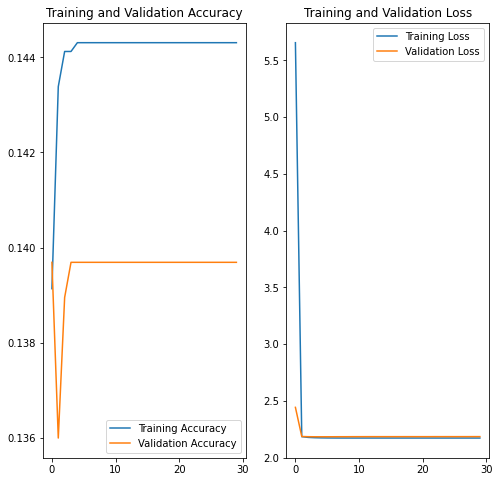

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Class Imbalance has been addressed by increasing no of images in every class. However, even after Normalization we see the model doesn't learn beyond a point and it severely underfits.